<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_3_Neural_Network_regression_with_TensorFlow/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we´re going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number



In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


#Create data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

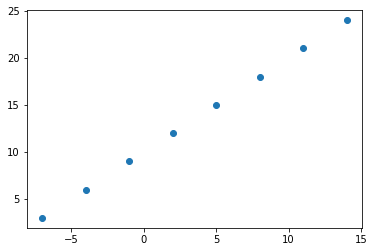

In [3]:
#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y)

#Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [6]:
print(input_shape)
print(output_shape)

()
()


In [7]:
X[0], Y[0]

(-7.0, 3.0)

#Turn NumPy arrays into tensors and Change Datatype



In [8]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)

In [9]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [11]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling with TensorFlow
1. Creating a model  define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model  define the loss function (in other words, the function how wrong it s) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance to our model).
3. Fitting a model - letting the model try to find pattern between X & Y (features an labels)

In [12]:
#Set random seed
tf.random.set_seed(42)

In [13]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 562ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
#Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#Try and make a predictions using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

###Improving our model

We can improve our mode, by altering the steps we took to create a model

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compile the model - here we might change the optimization function or perhaps the leraning rate of the optimization function.
3. Fitting the model - here we might fit a model for more epochs (leave training for longer) or on more data (give the model more examples to learn from)

In [17]:
#Let´s rebuild our model

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=100, verbose=0)

In [18]:
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [19]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
y_pred = model.predict([17.0])
y_pred

array([[26.58353]], dtype=float32)

###Evaluation a model

In practice, a typical workflow you´ll go through when building a neural network is:

Build a model -> fit it -> evaluate it -> tweak it -> Build a model -> fit it -> evaluate it -> tweak it -> Build a model -> fit it -> evaluate it -> tweak it -> ...

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, Visualize, Visualize"

It´s a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what dous our model look like?
* The training of a model - how does a model perform while it learn?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

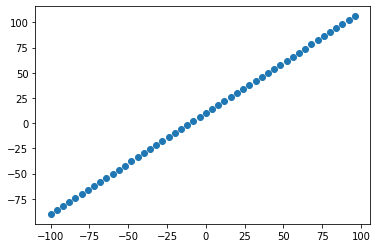

In [24]:
#Visualize the data
plt.scatter(X, y)

###The 3 sets...
* Training set - the model learns from this data, which is typicalle 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, thos is typically 10-15% of the total data available

In [26]:
len(X)

50

In [27]:
#Split the data into train and test sets

x_train = X[:40]
y_train = y[:40]
x_test = X[40:]
y_test = y[40:]

In [28]:
len(x_train), len(x_test)

(40, 10)

In [29]:
len(y_train), len(y_test)

(40, 10)

###Visualizing the data

We´ve got our data in training an test sets.. let´s visualize it again!

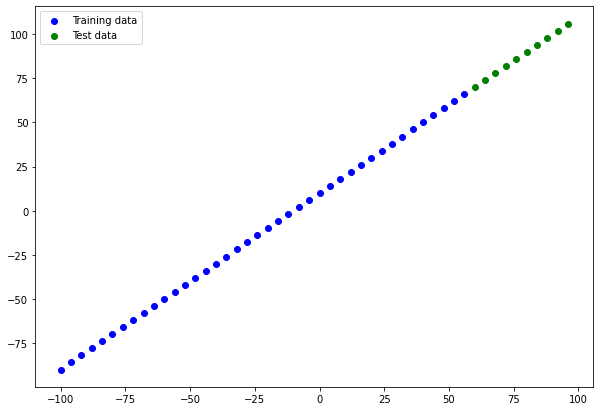

In [31]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") #our model will learn on this
#Plot training data in green
plt.scatter(x_test, y_test, c="g", label="Test data") #our model will predict on this
#show a legend
plt.legend()

In [33]:
#1. Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss="mae", optimizer="SGD", metrics=["mae"])

#3. Fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

###Visualizing the model

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Let´s create a model which build automaticall by defining the input_shape argument
tf.random.set_seed(42)

#1. Create a model 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(1, name="output_layer")
], name="model_with_name")

#2. Compile the model

model.compile(loss="mae", optimizer="SGD", metrics=["mae"])

#3. Fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

In [50]:
#get summary of model
model.summary()

Model: "model_with_name"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren´t updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

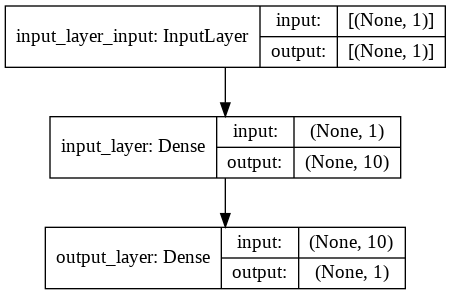

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

###Visualize models predictions

To visualize predictions, it´s a good idea to plot them against the ground truth labels.

Often you´ll see this in the form of y_test or y_true versus y_pred (ground truth versus the models predictions)

In [52]:
#Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

If you feel like you´re going to reuse some kind of functionality in the future, it´s a good idea to put in in a function

In [56]:
#Let´s create a plotting function
def plot_predictions(train_data=x_train, train_labels=y_train, 
                     test_data=x_test, test_labels=y_test, 
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

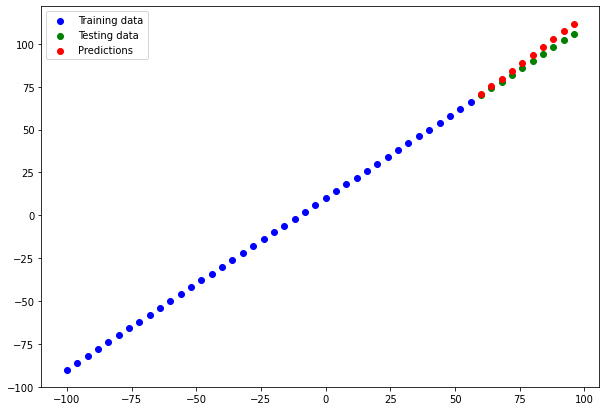

In [57]:
plot_predictions()